# Twitter Sentimental Analysis on Indian Elections 2018

### Team: Bodduna Satwick - [11810077] ,V Venkata Sai KushwanthReddy - [11810002] 


In [1]:
#Loading requried Libries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
from nltk.corpus import stopwords 
import re


%matplotlib inline  

##### Loading Scrapped Data from twitter

In [2]:
Election_data = pd.read_csv('TelanganaTweets.csv');   #Loading the Scraped Data from twitter using pandas 

In [3]:
print("Total Tweets avaliable : %d "% (len(Election_data)))   #Total Number of Tweets Available 
Election_data.info()  #Checkcing info of the Scrapped data

Total Tweets avaliable : 7456 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7456 entries, 0 to 7455
Data columns (total 9 columns):
Tweet Text         7456 non-null object
created_at         7456 non-null object
Location           7456 non-null object
verified           7456 non-null bool
description        7456 non-null object
followers_count    7456 non-null int64
Tweet Date         7456 non-null object
id                 7456 non-null int64
statuses_count     7456 non-null int64
dtypes: bool(1), int64(3), object(5)
memory usage: 473.4+ KB


##### Processing Data

In [4]:
pattern= r"(b')|\\x([0-9a-fA-F]+)|\\n"   #assinging customized regex pattern which for processing the tweets

processed_data =[];                            
for test in range(len(Election_data.iloc[:,0])):  #looping the first column of the df which is Tweet 
   processed_data.append(re.sub(pattern,"",Election_data.iloc[test,0]));   #Using the re.sub we are matching the pattern and replacing it with blank
preprocess_data = processed_data                       #Saving the data into a temp
preprocess_data[1:5]  #Checking the output

["#TRS is going to form Govt. in #Telangana on its own:  all  speculations are baseless. We should wait for the result. I dont want to comment on #Congress welcoming #AIMIM to #Prajakutami: #asaduddinowaisi Owaisi#TelanganaElections2018 @MumbaiMirror @BangaloreMirror'",
 "@asadowaisi Though I support #Prajakutami I want to see you as A central Cabinet minister for welfare of your community.Because for the representation of your community you look  significant.You are something more,you high potential why you want to limit to state politics?'",
 "#Telangana should demand reelection, bc, 2-3% vote swings can make or break elections, and we are talking about 8% votes here.What a cheat you are Election Commission. #Prajakutami is coming. https://t.co/A57E0yWBxv'",
 "@TelakapalliRavi The voting pattern in especially in rural #Telangana indicates either #TRS or #Prajakutami will get clear mandate. In majority of constituencies in the state recorded more than 80 percent turnout. It is a clear

In [5]:
    for tweets in range(len(Election_data.iloc[:,0])):   #Cleaning the tweets further removing all the symbols except numbers,aplhabates and #,@ we will be using #,@ for few analysis
        processed_data[tweets] = re.sub('[^ a-zA-Z|#|@|0-9]','',processed_data[tweets])
        processed_data[tweets] = processed_data[tweets].lower()  #making all the tweets lowercase 
    preprocess_data[1:5] #Checking the output

['#trs is going to form govt in #telangana on its own  all  speculations are baseless we should wait for the result i dont want to comment on #congress welcoming #aimim to #prajakutami #asaduddinowaisi owaisi#telanganaelections2018 @mumbaimirror @bangaloremirror',
 '@asadowaisi though i support #prajakutami i want to see you as a central cabinet minister for welfare of your communitybecause for the representation of your community you look  significantyou are something moreyou high potential why you want to limit to state politics',
 '#telangana should demand reelection bc 23 vote swings can make or break elections and we are talking about 8 votes herewhat a cheat you are election commission #prajakutami is coming httpstcoa57e0ywbxv',
 '@telakapalliravi the voting pattern in especially in rural #telangana indicates either #trs or #prajakutami will get clear mandate in majority of constituencies in the state recorded more than 80 percent turnout it is a clear sign of electorate giving o

In [6]:
Election_data['processed_text']=processed_data #Adding the temp data which processed and cleaned to the main dataframe
Election_data.head() #Checking the data

,Tweet Text,created_at,Location,verified,description,followers_count,Tweet Date,id,statuses_count,processed_text
0,b'Who will win Telangana Assembly Elections 20...,12/3/2018 14:35,"b'Hyderabad, India'",False,b'Indian Muslim. Politics. History. Chai. Qaww...,2,Sun Dec 09 16:35:04 +0000 2018,1069600000000000000,76,who will win telangana assembly elections 2018...
1,b'#TRS is going to form Govt. in #Telangana on...,11/26/2016 9:08,"b'Hyderabad, India'",False,"b'Assistant Editor Mumbai Mirror, covering And...",349,Sun Dec 09 14:36:30 +0000 2018,802439000000000000,3285,#trs is going to form govt in #telangana on it...
2,b'@asadowaisi \nThough I support #Prajakutami ...,4/25/2018 4:29,b'',False,b'Love to my #motherland #politics\n#mylovelyp...,357,Sun Dec 09 13:32:04 +0000 2018,988998000000000000,14369,@asadowaisi though i support #prajakutami i wa...
3,"b'#Telangana should demand reelection, bc, 2-3...",4/26/2009 11:45,"b'Mumbai, India'",False,"b'Bahujan Entrepreneur/Designer, #Education/#P...",192,Sun Dec 09 13:12:40 +0000 2018,35449908,7581,#telangana should demand reelection bc 23 vote...
4,b'@TelakapalliRavi The voting pattern in espec...,11/10/2018 4:08,"b'Visakhapatnam, India'",False,b'A vivid follower of politics',10,Sun Dec 09 11:33:06 +0000 2018,1061110000000000000,116,@telakapalliravi the voting pattern in especia...


##### Analysis on the tweets

In [7]:
#Assinging the tweets for a party by using the hashtags
Election_data['Split_Data'] = '';
for counting in range(len(preprocess_data)):    #Using the Preprocess data for spliting
    preprocess_data[counting] = str.split(preprocess_data[counting]); 
#Spliting the tweets into words for matching the dictonary items and for assiging party
Election_data['Split_Data']= preprocess_data;    #adding this words of the tweet to the dataframe
 
Election_data['Party']='';    #Creating a new column to store the party id 
for tweet in range(len(Election_data['Split_Data'])): #using the tweet words which we have processed earlier 
    TRS_Dict = ['@trspartyonline','@ktrtrs','#trs','#ktr','rao','#trs','#kcr','@asadowaisi','#telanganawithkcr','#aimim','#harishrao','@telanganacmo','#voteforcar','#phirekbaarkcr','@raokavitha','#kcrfailedtelangana','#votefortrs','#trsparty','#askktr','b"@ktrtrs','#trs,','#trs105#phirekbaarkcr','#prajaashirvadasabha','#phirekbaarkcr','#voteforpadmarao'];    
    bjp_Dict = ['@bjp4india','@bjp4telangana','modi','@bjp4india','#govotebjp','@narendramodi']                 
    Congress_Dict = ['tdp','congress','#mahakutami','#congress','@incindia','@jaitdp','#prajakutami','#mahakutami','#chandrababunaidu','@rahulgandhi','#revanthreddy','@uttamtpcc','#byebyetrs','alliance','#congressiswinning','#cpi','#cbnints','#cbnintelangana','#rahulgandhi','kutami','#prajakutamiwinning','#peoplesfront','#tdpcongress']
    #creating a list of hashtags or words which belongs to a each particular party which we are going to check in each tweet and assign to a party
    TRS_count = 0;
    bjp_count =0;
    Congress_count = 0;
    other_count =0;
    #intializing the variable with 0
    for words in Election_data.iloc[tweet,10]: #Creating a for loop getting the count of each words and party weightage
        if words in TRS_Dict:                 #If a tweet find the word in its party dict it will assign 1 and if it find again it will increment the value 
            TRS_count += 1;
        elif words in bjp_Dict:
            bjp_count +=1;
        elif words in Congress_Dict:
            Congress_count +=1;
        else:
            other_count =1;                    #If it dont find any of the words belongs to the any party then it will assign the value 1 to others
    if TRS_count > bjp_count and TRS_count > Congress_count: #here we will check the weightage of each party , this basically assign the party tag to the tweet which has the high weight
        Election_data.iloc[tweet,11] = 'TRS';
    elif bjp_count >TRS_count and bjp_count > Congress_count:
        Election_data.iloc[tweet,11] = 'BJP'
    elif Congress_count >TRS_count and Congress_count>bjp_count:
        Election_data.iloc[tweet,11] = 'Congress'
    else:
        Election_data.iloc[tweet,11] = 'Neutral' #if all the party weightage is zero then it will tag netural

In [8]:
Election_data.head()  #Checking the data after tagging the party to every tweet

,Tweet Text,created_at,Location,verified,description,followers_count,Tweet Date,id,statuses_count,processed_text,Split_Data,Party
0,b'Who will win Telangana Assembly Elections 20...,12/3/2018 14:35,"b'Hyderabad, India'",False,b'Indian Muslim. Politics. History. Chai. Qaww...,2,Sun Dec 09 16:35:04 +0000 2018,1069600000000000000,76,who will win telangana assembly elections 2018...,"[who, will, win, telangana, assembly, election...",Neutral
1,b'#TRS is going to form Govt. in #Telangana on...,11/26/2016 9:08,"b'Hyderabad, India'",False,"b'Assistant Editor Mumbai Mirror, covering And...",349,Sun Dec 09 14:36:30 +0000 2018,802439000000000000,3285,#trs is going to form govt in #telangana on it...,"[#trs, is, going, to, form, govt, in, #telanga...",Neutral
2,b'@asadowaisi \nThough I support #Prajakutami ...,4/25/2018 4:29,b'',False,b'Love to my #motherland #politics\n#mylovelyp...,357,Sun Dec 09 13:32:04 +0000 2018,988998000000000000,14369,@asadowaisi though i support #prajakutami i wa...,"[@asadowaisi, though, i, support, #prajakutami...",Neutral
3,"b'#Telangana should demand reelection, bc, 2-3...",4/26/2009 11:45,"b'Mumbai, India'",False,"b'Bahujan Entrepreneur/Designer, #Education/#P...",192,Sun Dec 09 13:12:40 +0000 2018,35449908,7581,#telangana should demand reelection bc 23 vote...,"[#telangana, should, demand, reelection, bc, 2...",Congress
4,b'@TelakapalliRavi The voting pattern in espec...,11/10/2018 4:08,"b'Visakhapatnam, India'",False,b'A vivid follower of politics',10,Sun Dec 09 11:33:06 +0000 2018,1061110000000000000,116,@telakapalliravi the voting pattern in especia...,"[@telakapalliravi, the, voting, pattern, in, e...",Neutral


##### Sentimental Analysis on tweets

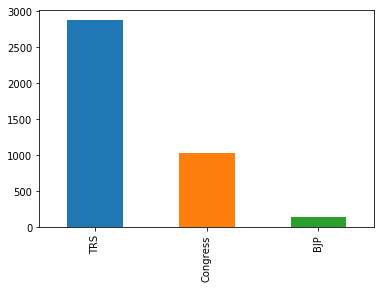

In [13]:
Election_data[Election_data['Party']!='Neutral'].Party.value_counts().plot(kind='bar') #Plotting the basic graph for review

In [9]:
#Creating the function for checking the sentiment of the tweet 
def sentimentscore(tweet):              
    analysis = TextBlob(tweet)              #passing the tweet into the textblob for analysing the polarity
    if analysis.sentiment.polarity > 0:     #Here we are assing one if the polarity is greater than 0 as positive tweet
        return 1
    elif analysis.sentiment.polarity == 0:  #Here we are assing zero if the polarity is is equals to0 as netural tweet 
        return 0
    else:
        return -1                           #Here we are assing -1 if the polarity is lessthan than 0 as negative tweet

In [10]:
Election_data['sentiment'] = Election_data['processed_text'].apply(sentimentscore)
#Applying the above defined function to the Processed text

In [11]:
#Checking the number of positve,Negative and neutral tweets 
print("Total Positve Tweets : %d "% (len(Election_data[Election_data['sentiment']>0])))
print("Total Neutral Tweets : %d "% (len(Election_data[Election_data['sentiment']==0])))
print("Total Negative Tweets : %d "% (len(Election_data[Election_data['sentiment']<0])))

Total Positve Tweets : 2830 
Total Neutral Tweets : 3725 
Total Negative Tweets : 901 


In [12]:
#Giving tag for the dataframe for further analysis on tableau
Election_data['State']='Telangana' 
Election_data.head() #Checking the data

,Tweet Text,created_at,Location,verified,description,followers_count,Tweet Date,id,statuses_count,processed_text,Split_Data,Party,sentiment,State
0,b'Who will win Telangana Assembly Elections 20...,12/3/2018 14:35,"b'Hyderabad, India'",False,b'Indian Muslim. Politics. History. Chai. Qaww...,2,Sun Dec 09 16:35:04 +0000 2018,1069600000000000000,76,who will win telangana assembly elections 2018...,"[who, will, win, telangana, assembly, election...",Neutral,1,Telangana
1,b'#TRS is going to form Govt. in #Telangana on...,11/26/2016 9:08,"b'Hyderabad, India'",False,"b'Assistant Editor Mumbai Mirror, covering And...",349,Sun Dec 09 14:36:30 +0000 2018,802439000000000000,3285,#trs is going to form govt in #telangana on it...,"[#trs, is, going, to, form, govt, in, #telanga...",Neutral,1,Telangana
2,b'@asadowaisi \nThough I support #Prajakutami ...,4/25/2018 4:29,b'',False,b'Love to my #motherland #politics\n#mylovelyp...,357,Sun Dec 09 13:32:04 +0000 2018,988998000000000000,14369,@asadowaisi though i support #prajakutami i wa...,"[@asadowaisi, though, i, support, #prajakutami...",Neutral,1,Telangana
3,"b'#Telangana should demand reelection, bc, 2-3...",4/26/2009 11:45,"b'Mumbai, India'",False,"b'Bahujan Entrepreneur/Designer, #Education/#P...",192,Sun Dec 09 13:12:40 +0000 2018,35449908,7581,#telangana should demand reelection bc 23 vote...,"[#telangana, should, demand, reelection, bc, 2...",Congress,0,Telangana
4,b'@TelakapalliRavi The voting pattern in espec...,11/10/2018 4:08,"b'Visakhapatnam, India'",False,b'A vivid follower of politics',10,Sun Dec 09 11:33:06 +0000 2018,1061110000000000000,116,@telakapalliravi the voting pattern in especia...,"[@telakapalliravi, the, voting, pattern, in, e...",Neutral,1,Telangana


##### Analysis on Hashtag's

In [14]:
#word frequency of hashtags
stop = stopwords.words('english')  #Loading the stopwords from library
Election_data["Clean_tweet_stopwords"] = Election_data["processed_text"].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
#by using the stopwords library we are searching in the tweets and replacing it with blank

In [15]:
FrequencyTags=pd.Series(np.concatenate([x.split() for x in Election_data.Clean_tweet_stopwords])).value_counts()
#Calculating the frequency of each tag
HashFreq = pd.DataFrame(FrequencyTags)  #converting the pandas series to dataframe
HashFreq=HashFreq.reset_index()         #resting the index
HashFreq.columns = ['HashWord', 'Frequency']   #adding the colum names to the new df
HashFreq['State']='Telangana'                  #adding Tag for further analysis in Tableau
HashFreq.head()                                #Checking the data

,HashWord,Frequency,State
0,#telanganaelections,2521,Telangana
1,#trs,1922,Telangana
2,#telanganaelections2018,1716,Telangana
3,vote,1528,Telangana
4,#telanganawithkcr,1126,Telangana


##### Storing the Processed data into CSV

In [16]:
Election_data.to_csv('TelanganaSentimentProcessed.csv')           #storing the processdata into the csv 
HashFreq.to_csv('TelanganaWords.csv')                             #Sotring the word frequency into csv